# LSTM
___

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 단층 LSTM

In [2]:
df = pd.read_csv("./datasets/005930.KS.csv")

In [3]:
df.shape

(5675, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5675 entries, 0 to 5674
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5675 non-null   object 
 1   Open       5675 non-null   float64
 2   High       5675 non-null   float64
 3   Low        5675 non-null   float64
 4   Close      5675 non-null   float64
 5   Adj Close  5675 non-null   float64
 6   Volume     5675 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 310.5+ KB


In [5]:
# 이동평균

#3평선
ma3 = df["Adj Close"].rolling(window=3).mean()

In [6]:
#5평선
ma5 = df["Adj Close"].rolling(window=5).mean()

In [7]:
df['3MA'] = ma3
df['5MA'] = ma5

In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,3MA,5MA
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4623.467285,74195000,NaN,NaN
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4222.413086,74680000,NaN,NaN
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4252.682129,54390000,4366.187500,NaN
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4192.144531,40305000,4222.413249,NaN
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4366.186523,46880000,4270.337728,4331.378711


In [9]:
df['MID'] = (df['High'] + df['Low'])/2

In [10]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,3MA,5MA,MID
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4623.467285,74195000,NaN,NaN,5885.0
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4222.413086,74680000,NaN,NaN,5790.0
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4252.682129,54390000,4366.187500,NaN,5680.0
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4192.144531,40305000,4222.413249,NaN,5515.0
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4366.186523,46880000,4270.337728,4331.378711,5675.0


## 시각화

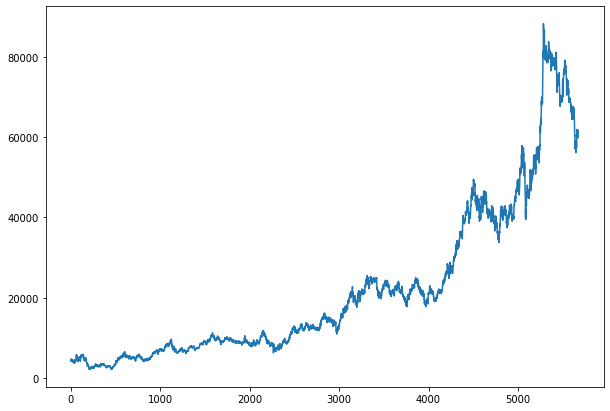

In [11]:
plt.figure(figsize=(10,7))
plt.plot(df['Adj Close'])
plt.show()

In [12]:
# 결손치

df.isna().sum(axis=0)

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
3MA          2
5MA          4
MID          0
dtype: int64

In [13]:
for col in df.columns:
    missing_rows = df.loc[df[col]==0,:].shape[0] #각 칼럼에 0이 몇개 있는지 조사
    print(col + " :" + str(missing_rows))

Date :0
Open :0
High :0
Low :0
Close :0
Adj Close :0
Volume :127
3MA :0
5MA :0
MID :0


In [14]:
# Volume == 0 데이터 표시하기

df.loc[df["Volume"] == 0, :]

,Date,Open,High,Low,Close,Adj Close,Volume,3MA,5MA,MID
23,2000-02-04,5130.0,5130.0,5130.0,5130.0,3881.895752,0,3912.164063,3996.914844,5130.0
41,2000-03-01,5120.0,5120.0,5120.0,5120.0,3874.329834,0,3793.614502,3818.333643,5120.0
66,2000-04-05,6800.0,6800.0,6800.0,6800.0,5145.594238,0,5221.264485,5213.697265,6800.0
72,2000-04-13,6910.0,6910.0,6910.0,6910.0,5228.832520,0,5276.756673,5360.498340,6910.0
84,2000-05-01,6000.0,6000.0,6000.0,6000.0,4540.229980,0,4388.888753,4334.406689,6000.0
...,...,...,...,...,...,...,...,...,...,...
5564,2022-02-28,71900.0,71900.0,71900.0,71900.0,71095.539063,0,70963.695313,71965.689063,71900.0
5567,2022-03-04,72900.0,72900.0,72900.0,72900.0,72084.343750,0,71688.817708,71451.506250,72900.0
5570,2022-03-10,69500.0,69500.0,69500.0,69500.0,68722.390625,0,68920.151042,70185.828125,69500.0
5573,2022-03-15,70200.0,70200.0,70200.0,70200.0,69414.554688,0,69348.635417,69098.137500,70200.0


In [15]:
# 0값 데이터 날리기
# 0을 nan으로 만들고 nan을 날란다.
df['Volume'] = df['Volume'].replace(0, np.nan)

In [16]:
df.isna().sum(axis=0)

Date           0
Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume       127
3MA            2
5MA            4
MID            0
dtype: int64

In [17]:
df = df.dropna()

In [18]:
df.isna().sum(axis=0)

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
3MA          0
5MA          0
MID          0
dtype: int64

In [19]:
# 정규화 (스케일링)
#Dtype이 숫자인 것만 스케일링 진행
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5544 entries, 4 to 5674
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5544 non-null   object 
 1   Open       5544 non-null   float64
 2   High       5544 non-null   float64
 3   Low        5544 non-null   float64
 4   Close      5544 non-null   float64
 5   Adj Close  5544 non-null   float64
 6   Volume     5544 non-null   float64
 7   3MA        5544 non-null   float64
 8   5MA        5544 non-null   float64
 9   MID        5544 non-null   float64
dtypes: float64(9), object(1)
memory usage: 476.4+ KB


In [20]:
sel_col = df.select_dtypes(include=['number']).columns #특정 타입을 가진 컬럼 뽑아내기

In [21]:
#pip install -U scikit-learn

In [22]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
scaled_df = sc.fit_transform(df.select_dtypes(include=['number']))

In [23]:
scaled_df = pd.DataFrame(scaled_df, columns=sel_col)

In [24]:
scaled_df.head()

,Open,High,Low,Close,Adj Close,Volume,3MA,5MA,MID
0,0.034868,0.032008,0.036288,0.034440,0.026655,0.285359,0.025192,0.025698,0.034066
1,0.037375,0.035517,0.038470,0.034440,0.026655,0.363715,0.025634,0.025094,0.036937
2,0.034982,0.031689,0.036518,0.033873,0.026217,0.177799,0.026163,0.025343,0.034011
3,0.034868,0.031689,0.036059,0.033760,0.026129,0.250704,0.025987,0.025503,0.033790
4,0.036235,0.033177,0.037437,0.035120,0.027181,0.300555,0.026163,0.026018,0.035225


## 데이터 만들기

In [25]:
feature_cols = ['Adj Close', '3MA', '5MA', 'MID']
label_col = ['Close']

In [26]:
feature_df = scaled_df.loc[:, feature_cols]
label_df = scaled_df.loc[:, label_col]

In [27]:
feature_np = feature_df.to_numpy()
label_np = label_df.to_numpy()

In [49]:
#시계열 데이터를 timestep으로 바꿔주는 함수
def make_sequence_dataset(feature, label, window_size):
    feature_list = []
    label_list = []
    
    for i in range(len(feature)-window_size):
        feature_list.append(feature[i:i+window_size])
        label_list.append(label[i+window_size])
        
    return np.array(feature_list), np.array(label_list)

In [50]:
window_size = 40 #앞의 40일분의 데이터를 보고 다음날을 예측한다고 하자.
X_data, y_data = make_sequence_dataset(feature_np, label_np, window_size)

In [51]:
X_data.shape

(5504, 40, 4)

In [52]:
y_data.shape

(5504, 1)

In [53]:
# 학습/검증셋 분리
# 기존에 계속 사용해오던 train_test_split을 사용하게 되면 시계열이 섞이기 때문에 다르게 분리해야한다.

split = int(len(X_data)*0.8)

X_train = X_data[:split]
y_train = y_data[:split]
X_test = X_data[split:]
y_test = y_data[split:]

In [54]:
X_train.shape

(4403, 40, 4)

In [55]:
X_train[:1]

array([[[0.02665502, 0.02519219, 0.02569813, 0.03406581],
        [0.02665502, 0.02563364, 0.0250943 , 0.03693684],
        [0.02621664, 0.02616339, 0.02534294, 0.0340106 ],
        [0.02612895, 0.02598681, 0.02550278, 0.03378975],
        [0.02718112, 0.0261634 , 0.02601781, 0.03522527],
        [0.02954852, 0.02728174, 0.02660388, 0.03820671],
        [0.02954852, 0.02842952, 0.02718995, 0.03842756],
        [0.02832098, 0.02881212, 0.02761618, 0.03765459],
        [0.02902242, 0.02863553, 0.02820225, 0.03688163],
        [0.02761953, 0.02798807, 0.02829105, 0.03688163],
        [0.02604125, 0.02722288, 0.02758066, 0.03544611],
        [0.02376156, 0.02545707, 0.02640853, 0.03257509],
        [0.02411228, 0.02427986, 0.02555606, 0.03174691],
        [0.024463  , 0.02375012, 0.02463256, 0.03240945],
        [0.02709344, 0.02486847, 0.024526  , 0.0344523 ],
        [0.02498908, 0.02516276, 0.02431289, 0.03373454],
        [0.02270937, 0.02457416, 0.02409977, 0.03180212],
        [0.022

## 모델

In [56]:
#pip install tensorflow

In [57]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.LSTM(128, activation='tanh', input_shape=(40, 4)))
model.add(layers.Dense(1, activation='linear'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               68096     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 68,225
Trainable params: 68,225
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.compile(loss='mse', optimizer = 'adam',
             metrics=['mae'])

In [59]:
EPOCHS = 100
BATCH_SIZE = 16

history = model.fit(X_train, y_train,
         validation_data=(X_test, y_test),
         epochs=EPOCHS,
         batch_size=BATCH_SIZE)

Epoch 1/100
276/276 [==============================] - 6s 17ms/step - loss: 7.3225e-04 - mae: 0.0110 - val_loss: 9.3230e-04 - val_mae: 0.0240
Epoch 2/100
276/276 [==============================] - 5s 16ms/step - loss: 6.3903e-05 - mae: 0.0058 - val_loss: 7.8593e-04 - val_mae: 0.0218
Epoch 3/100
276/276 [==============================] - 4s 16ms/step - loss: 6.0909e-05 - mae: 0.0057 - val_loss: 0.0011 - val_mae: 0.0279
Epoch 4/100
276/276 [==============================] - 4s 16ms/step - loss: 5.9494e-05 - mae: 0.0056 - val_loss: 8.9073e-04 - val_mae: 0.0243
Epoch 5/100
276/276 [==============================] - 4s 16ms/step - loss: 5.1619e-05 - mae: 0.0052 - val_loss: 0.0010 - val_mae: 0.0268
Epoch 6/100
276/276 [==============================] - 4s 16ms/step - loss: 5.4305e-05 - mae: 0.0054 - val_loss: 7.4084e-04 - val_mae: 0.0218
Epoch 7/100
276/276 [==============================] - 4s 16ms/step - loss: 4.7812e-05 - mae: 0.0051 - val_loss: 6.3833e-04 - val_mae: 0.0202
Epoch 8/100
27

In [60]:
import matplotlib.pyplot as plt

def plot_history(history):
    his_dict = history.history
    epochs = history.epoch

    plt.figure(figsize = (16, 7))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, his_dict['mae'], 'b--', label = 'train_mae')
    plt.plot(epochs, his_dict['val_mae'], 'r-', label = 'val_mae')
    plt.title('mae')
    plt.xlabel('epochs')
    plt.ylabel('mae')
    plt.legend()


    plt.subplot(1, 2, 2)
    plt.plot(epochs, his_dict['loss'], 'b--', label = 'train_loss')
    plt.plot(epochs, his_dict['val_loss'], 'r-', label = 'val_loss')
    plt.title('loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()



In [61]:
y_pred = model.predict(X_test)

35/35 [==============================] - 1s 8ms/step


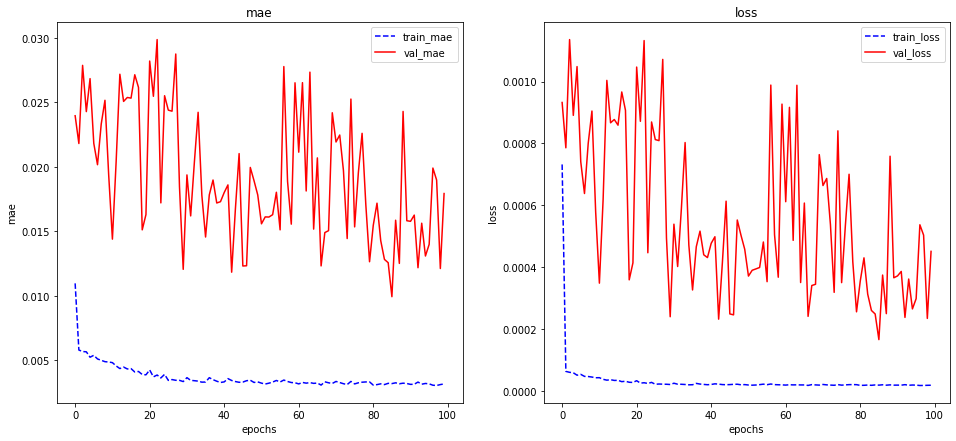

In [62]:
plot_history(history)

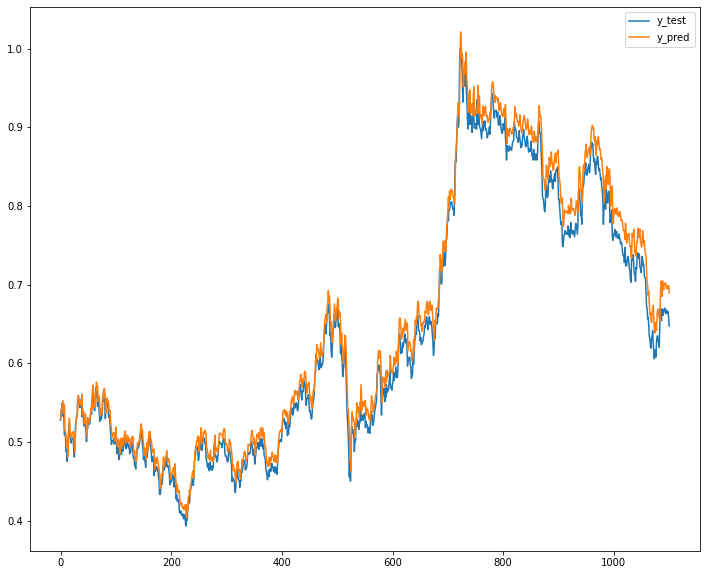

In [63]:
plt.figure(figsize=(12,10))
plt.plot(y_test, label='y_test')
plt.plot(y_pred, label='y_pred')
plt.legend()
plt.show()

## Multi LSTM

In [66]:
def build_model():
    model = keras.Sequential()
    model.add(layers.LSTM(128, activation='tanh', return_sequences=True, input_shape=(40, 4)))
    model.add(layers.LSTM(128, activation='tanh'))
    model.add(layers.Dense(1, activation='linear'))
    return model

In [67]:
model = build_model()
model.compile(loss = 'mse',
             optimizer = 'adam',
             metrics=['mae'])


In [68]:
EPOCHS = 100
BATCH_SIZE = 16

history = model.fit(X_train, y_train,
         validation_data=(X_test, y_test),
         epochs=EPOCHS,
         batch_size=BATCH_SIZE)

Epoch 1/100
276/276 [==============================] - 10s 29ms/step - loss: 5.7666e-04 - mae: 0.0099 - val_loss: 6.2021e-04 - val_mae: 0.0183
Epoch 2/100
276/276 [==============================] - 7s 26ms/step - loss: 8.1875e-05 - mae: 0.0066 - val_loss: 5.9518e-04 - val_mae: 0.0181
Epoch 3/100
276/276 [==============================] - 7s 26ms/step - loss: 7.4411e-05 - mae: 0.0063 - val_loss: 6.7976e-04 - val_mae: 0.0202
Epoch 4/100
276/276 [==============================] - 7s 26ms/step - loss: 7.6368e-05 - mae: 0.0063 - val_loss: 5.1098e-04 - val_mae: 0.0170
Epoch 5/100
276/276 [==============================] - 7s 26ms/step - loss: 6.7503e-05 - mae: 0.0059 - val_loss: 0.0014 - val_mae: 0.0311
Epoch 6/100
276/276 [==============================] - 7s 26ms/step - loss: 6.2389e-05 - mae: 0.0057 - val_loss: 0.0014 - val_mae: 0.0324
Epoch 7/100
276/276 [==============================] - 7s 27ms/step - loss: 6.8061e-05 - mae: 0.0060 - val_loss: 0.0027 - val_mae: 0.0456
Epoch 8/100
276/2